In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [3]:
google_stock_df = pd.read_csv('google-stock-dataset-Daily.csv', index_col=False)
google_stock_df = google_stock_df.drop(columns=['Unnamed: 0'])

In [4]:
temp_df = google_stock_df.copy()

In [5]:
temp_df['Date'] = pd.to_datetime(temp_df['Date'])
temp_df.set_index('Date', inplace=True)

In [6]:
# Split the data into training and testing sets
train_size = int(len(temp_df) * 0.80)
train_data, test_data = temp_df[:train_size], temp_df[train_size:]

In [7]:
train_org_data, test_org_data = google_stock_df[:train_size], google_stock_df[train_size:]

In [8]:
test_org_data

,Date,Price,High,Low,Close,Volume,Adj Close
2008,2021-04-06,110.55,111.40,110.09,110.46,35240000,110.46
2009,2021-04-07,110.65,112.22,110.65,111.95,24134000,111.95
2010,2021-04-08,113.20,113.59,112.15,112.52,28664000,112.52
2011,2021-04-09,112.27,113.70,111.86,113.53,26146000,113.53
2012,2021-04-12,112.71,112.84,111.39,112.23,25024000,112.23
...,...,...,...,...,...,...,...
2505,2023-03-27,104.62,104.76,101.93,102.46,31120900,102.46
2506,2023-03-28,102.44,102.45,99.74,101.03,32057900,101.03
2507,2023-03-29,102.28,102.49,100.65,101.39,28779600,101.39
2508,2023-03-30,100.91,101.16,99.78,100.89,33086200,100.89


In [9]:
test_data

,Price,High,Low,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,110.55,111.40,110.09,110.46,35240000,110.46
2021-04-07,110.65,112.22,110.65,111.95,24134000,111.95
2021-04-08,113.20,113.59,112.15,112.52,28664000,112.52
2021-04-09,112.27,113.70,111.86,113.53,26146000,113.53
2021-04-12,112.71,112.84,111.39,112.23,25024000,112.23
...,...,...,...,...,...,...
2023-03-27,104.62,104.76,101.93,102.46,31120900,102.46
2023-03-28,102.44,102.45,99.74,101.03,32057900,101.03
2023-03-29,102.28,102.49,100.65,101.39,28779600,101.39


In [10]:
# Define the ARIMA order (p, d, q)
p, d, q = 7, 2, 4  # ARIMA hyperparameters

# Fit ARIMA model on the entire dataset without exogenous variables
model = ARIMA(train_data['Adj Close'], order=(p, d, q))
model_fit = model.fit()

/home/jupyter-dhruv/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jupyter-dhruv/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jupyter-dhruv/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
# Forecast the values for the next 502 days in the future
forecast_periods = len(test_data)
forecast_values = model_fit.forecast(steps=forecast_periods)

/home/jupyter-dhruv/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jupyter-dhruv/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
org_train_data, org_test_data = google_stock_df[:train_size], temp_df[train_size:]

In [13]:
org_test_data

,Price,High,Low,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,110.55,111.40,110.09,110.46,35240000,110.46
2021-04-07,110.65,112.22,110.65,111.95,24134000,111.95
2021-04-08,113.20,113.59,112.15,112.52,28664000,112.52
2021-04-09,112.27,113.70,111.86,113.53,26146000,113.53
2021-04-12,112.71,112.84,111.39,112.23,25024000,112.23
...,...,...,...,...,...,...
2023-03-27,104.62,104.76,101.93,102.46,31120900,102.46
2023-03-28,102.44,102.45,99.74,101.03,32057900,101.03
2023-03-29,102.28,102.49,100.65,101.39,28779600,101.39


In [14]:
forecast_values

2008    110.250175
2009    110.660183
2010    110.536216
2011    110.456911
2012    109.977068
           ...    
2505    132.320483
2506    132.365745
2507    132.411008
2508    132.456271
2509    132.501534
Name: predicted_mean, Length: 502, dtype: float64

In [27]:
forecast_dates = org_test_data.index

In [28]:
forecast_dates

DatetimeIndex(['2021-04-06', '2021-04-07', '2021-04-08', '2021-04-09',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-19',
               ...
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [20]:
test_data['Adj Close']

Date
2021-04-06    110.46
2021-04-07    111.95
2021-04-08    112.52
2021-04-09    113.53
2021-04-12    112.23
               ...  
2023-03-27    102.46
2023-03-28    101.03
2023-03-29    101.39
2023-03-30    100.89
2023-03-31    103.73
Name: Adj Close, Length: 502, dtype: float64

In [19]:
forecast_values

2008    110.250175
2009    110.660183
2010    110.536216
2011    110.456911
2012    109.977068
           ...    
2505    132.320483
2506    132.365745
2507    132.411008
2508    132.456271
2509    132.501534
Name: predicted_mean, Length: 502, dtype: float64

In [30]:
# Create a DataFrame for the actual and predicted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Actual Price': test_data['Adj Close'].values, 'Predicted Price': forecast_values})
forecast_df.reset_index(drop=True, inplace=True)

In [31]:
# Print or use the forecast_df as needed
print(forecast_df)

          Date  Actual Price  Predicted Price
0   2021-04-06        110.46       110.250175
1   2021-04-07        111.95       110.660183
2   2021-04-08        112.52       110.536216
3   2021-04-09        113.53       110.456911
4   2021-04-12        112.23       109.977068
..         ...           ...              ...
497 2023-03-27        102.46       132.320483
498 2023-03-28        101.03       132.365745
499 2023-03-29        101.39       132.411008
500 2023-03-30        100.89       132.456271
501 2023-03-31        103.73       132.501534

[502 rows x 3 columns]


In [32]:
def evaluate(predictions):
    print("MSE",round(mean_squared_error(predictions['Actual Price'], predictions['Predicted Price']), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(predictions['Actual Price'], predictions['Predicted Price'])), 3))
    print("MAE",round(mean_absolute_error(predictions['Actual Price'], predictions['Predicted Price']), 3))

In [33]:
evaluate(forecast_df)

MSE 549.547
RMSE 23.442
MAE 20.549


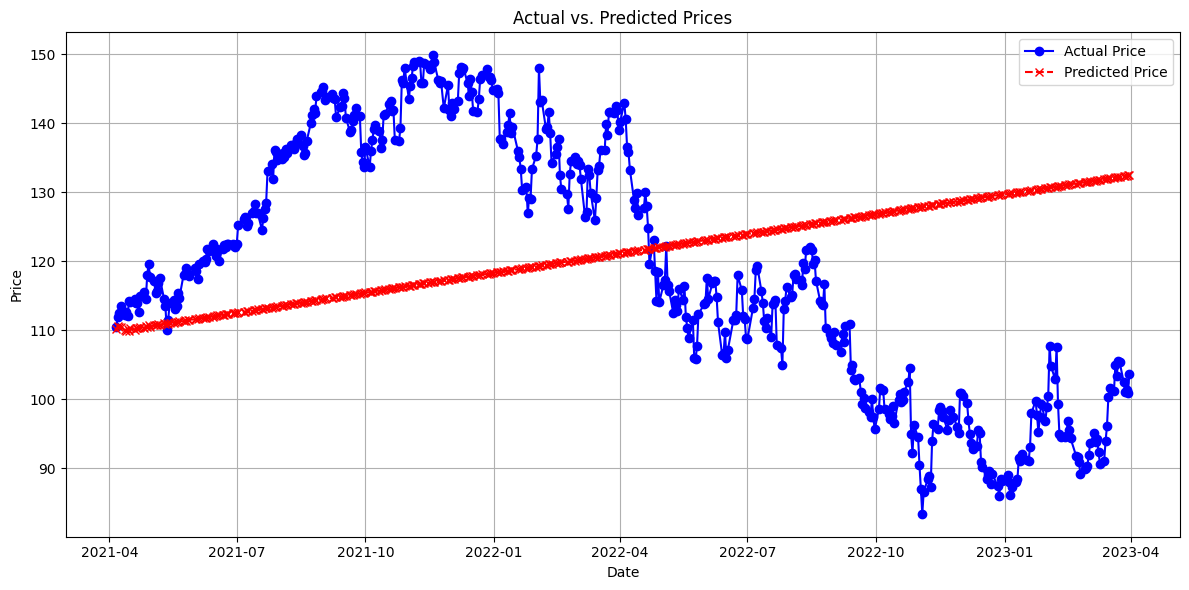

In [34]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual Price'], label='Actual Price', marker='o', linestyle='-', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted Price'], label='Predicted Price', marker='x', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the graph (you can also save it as an image using plt.savefig)
plt.show()